In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/result.csv', parse_dates=['time'], index_col=['time'])
data

,outdoor_temp,zone_temp,occupancy,supply_temp,air_flow
time,,,,,
2017-01-01 00:00:00,2.200,22.832449,0,25.000003,0.733767
2017-01-01 00:05:00,1.825,22.824465,0,25.000003,0.733767
2017-01-01 00:10:00,1.450,22.812760,0,25.000003,0.733767
2017-01-01 00:15:00,1.075,22.799019,0,25.000003,0.733767
2017-01-01 00:20:00,0.700,22.784421,0,25.000003,0.733767
...,...,...,...,...,...
2017-12-31 23:40:00,6.000,22.990503,0,25.000004,0.733767
2017-12-31 23:45:00,6.000,22.988552,0,25.000004,0.733767
2017-12-31 23:50:00,6.000,22.986715,0,25.000004,0.733767


In [5]:
train_data = data.loc['2017-11-14 15:21:00':'2017-11-14 16:20:00']
test_data = data.loc['2017-12-10 09:05:00':'2017-04-09 09:55:00']

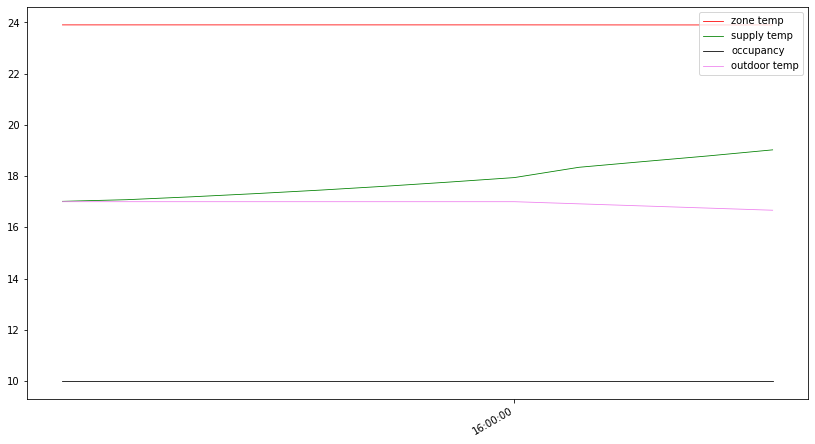

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(train_data.index, train_data['zone_temp'].values, color = 'red', linewidth = 0.8, label = 'zone temp')
ax.plot(train_data.index, train_data['supply_temp'].values, color = 'green', linewidth = 0.8, label = 'supply temp')
ax.plot(train_data.index, train_data['occupancy'].values, color = 'black', linewidth = 0.8, label = 'occupancy')
ax.plot(train_data.index, train_data['outdoor_temp'].values, color = 'violet', linewidth = 0.8, label = 'outdoor temp')
#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
plt.legend()
plt.show()

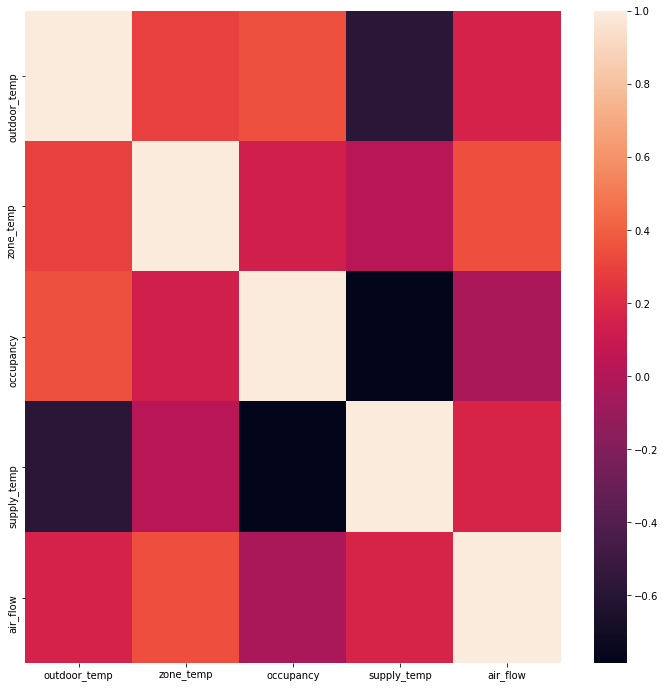

In [272]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())

In [273]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

x = train_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y = train_data[['zone_temp']]

scale = StandardScaler()

#x = scale.fit_transform(x)
#y = scale.fit_transform(y)
regr = linear_model.LinearRegression()
regr.fit(x, y)

x_test = test_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y_test = test_data[['zone_temp']]
#x_test = scale.fit_transform(x_test)
#y_test = scale.fit_transform(y_test)
y_pred = regr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

3.4874566863238514

In [274]:
#x = sm.add_constant(train_data['outdoor_temp']) # adding a constant
 
model = sm.OLS(y, x).fit()
y_pred = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:              zone_temp   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.940e+04
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                    3.98e-37
Time:                        23:30:23   Log-Likelihood:                         -10.387
No. Observations:                  25   AIC:                                      28.77
Df Residuals:                      21   BIC:                                      33.65
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [275]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score, mean_squared_error

error = rmse(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

7.848822147666325

In [278]:
print(y_test)
y_pred

                     zone_temp
time                          
2017-04-09 09:05:00  22.944538
2017-04-09 09:10:00  22.097150
2017-04-09 09:15:00  22.054237
2017-04-09 09:20:00  21.983050
2017-04-09 09:25:00  21.863581
2017-04-09 09:30:00  21.783116
2017-04-09 09:35:00  21.759282
2017-04-09 09:40:00  21.768163
2017-04-09 09:45:00  21.789539
2017-04-09 09:50:00  21.816508
2017-04-09 09:55:00  21.848786


time
2017-04-09 09:05:00    28.966522
2017-04-09 09:10:00    29.117566
2017-04-09 09:15:00    29.271660
2017-04-09 09:20:00    29.428655
2017-04-09 09:25:00    29.589602
2017-04-09 09:30:00    29.753938
2017-04-09 09:35:00    29.929255
2017-04-09 09:40:00    30.108845
2017-04-09 09:45:00    30.291700
2017-04-09 09:50:00    30.477220
2017-04-09 09:55:00    30.665238
dtype: float64

In [279]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
regressor = SVR()
model = regressor.fit(x, y)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print('y_test: ',y_test.zone_temp.values)
print('y_pred: ',y_pred)

1.6284096530780656
y_test:  [22.94453836 22.09715022 22.05423657 21.98304977 21.86358077 21.78311596
 21.75928173 21.76816334 21.78953917 21.81650768 21.84878617]
y_pred:  [23.49290419 23.50966431 23.5255515  23.5405695  23.55461462 23.56773145
 23.57924743 23.58975531 23.59933567 23.60803217 23.61585089]


/Users/devanshukumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [265]:
x = data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y = data[['zone_temp']]

In [266]:
print(y_pred)
test = 2*y_pred
print(test)

[21.90951669 21.91082764 21.91205926 21.91329758 21.91453932 21.91578366
 21.91622415 21.91703232 21.91787555 21.91870197 21.91952914 21.92035946]
[43.81903338 43.82165529 43.82411853 43.82659517 43.82907864 43.83156732
 43.8324483  43.83406465 43.83575109 43.83740395 43.83905829 43.84071893]


In [214]:
from sklearn import preprocessing
y_pred1 = np.round(y_pred, 2)
test1 = np.round(test, 2)
p = np.histogram(y_pred1)[0] / len(y_pred1)    
q = np.histogram(test1)[0] / len(test1)
#print(np.histogram(y_pred1))
print(p)
print(q)
print(np.sum(p))

[0.16666667 0.         0.         0.08333333 0.16666667 0.
 0.16666667 0.08333333 0.16666667 0.16666667]
[0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.16666667 0.08333333 0.16666667]
0.9999999999999999


In [34]:
from scipy.spatial import distance
distance.jensenshannon(p, q) ** 2

0.06884114906231906

In [130]:
vec1 = [23.10465662,23.11223222, 23.25762798]
vec2 = [23.90325824,23.90325824,23.90325824]
vec1 = np.round(vec1, 2)
vec2 = np.round(vec2, 2)
min_vec1 = min(vec1)
min_vec2 = min(vec2)
max_vec1 = max(vec1)
max_vec2 = max(vec2)
mini = min_vec1
maxi = max_vec1
if min_vec1 > min_vec2:
    mini = min_vec2
if max_vec1 < max_vec2:
    maxi = max_vec2
b = []
i = mini
while i <= maxi+0.1:
    b.append(i)
    i = i + 0.1
vec3 = np.random.uniform(low=0, high=60, size=(10,))
vec4 = np.random.uniform(low=0, high=60, size=(10,))
print(vec1)
print(vec2)
print(maxi)
print(mini)
b = np.round(b, 2)
print(b)

[23.1  23.11 23.26]
[23.9 23.9 23.9]
23.9
23.1
[23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9]


In [132]:
p = np.histogram(vec1, bins = b)[0] / len(vec1)
print(np.histogram(vec1, bins = b)[0])
q = np.histogram(vec2, bins = b)[0] / len(vec2)
print(np.histogram(vec2, bins = b)[0])
#print(np.histogram(y_pred1))
print(p)
print(q)
print(np.sum(p))

[2 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 3]
[0.66666667 0.33333333 0.         0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 1.]
1.0


In [133]:
distance.jensenshannon(p, q) ** 2

0.6931471805599452

In [72]:
s = []
for i in range(10):
    vec3 = np.random.uniform(low=0, high=0.1, size=(10,))
    vec4 = np.random.uniform(low=0, high=0.1, size=(10,))
    vec3 = np.round(vec3, 2)
    vec4 = np.round(vec4, 2)
    print(vec3)
    print(vec4)
    p = np.histogram(vec3)[0] / len(vec3)    
    q = np.histogram(vec4)[0] / len(vec4)
    s.append(distance.jensenshannon(p, q))
s = np.array(s)
print(np.median(s))
print(np.mean(s))

[0.05 0.09 0.1  0.04 0.09 0.03 0.04 0.04 0.02 0.  ]
[0.   0.07 0.08 0.   0.03 0.1  0.05 0.01 0.03 0.05]
[0.04 0.08 0.05 0.06 0.1  0.04 0.06 0.05 0.05 0.03]
[0.02 0.08 0.05 0.06 0.09 0.02 0.01 0.08 0.03 0.02]
[0.08 0.03 0.08 0.01 0.07 0.05 0.02 0.   0.08 0.07]
[0.06 0.05 0.02 0.1  0.08 0.05 0.09 0.04 0.09 0.06]
[0.03 0.05 0.05 0.06 0.1  0.08 0.01 0.08 0.03 0.  ]
[0.1  0.02 0.06 0.09 0.09 0.08 0.03 0.03 0.01 0.02]
[0.03 0.05 0.09 0.03 0.08 0.08 0.03 0.   0.07 0.02]
[0.03 0.02 0.03 0.05 0.01 0.03 0.03 0.   0.03 0.05]
[0.02 0.05 0.07 0.02 0.03 0.06 0.02 0.04 0.09 0.05]
[0.05 0.09 0.   0.04 0.06 0.04 0.08 0.08 0.06 0.02]
[0.09 0.05 0.09 0.06 0.03 0.05 0.02 0.04 0.03 0.03]
[0.1  0.03 0.   0.01 0.01 0.09 0.09 0.07 0.07 0.1 ]
[0.09 0.02 0.01 0.03 0.04 0.07 0.03 0.08 0.06 0.01]
[0.04 0.06 0.04 0.04 0.06 0.01 0.1  0.05 0.   0.01]
[0.07 0.04 0.01 0.   0.1  0.02 0.1  0.07 0.03 0.09]
[0.03 0.06 0.07 0.08 0.01 0.01 0.05 0.08 0.08 0.03]
[0.04 0.07 0.07 0.05 0.09 0.03 0.04 0.07 0.04 0.05]
[0.07 0.   0